Can do this simultaneously as the notebook from last week that runs the models; I'll import them here, average them, and do some metrics etc on them.

In [1]:
#imports
import uproot as ur
import awkward as ak
import numpy as np

import os
os.environ['CUDA_VISIBLE_DEVICES'] = "6" #specify GPU
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import tensorflow as tf

# energyflow imports
import energyflow as ef
from energyflow.archs import PFN
from energyflow.utils import data_split

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

import graph_util as gu
import plot_util as pu

from scipy.interpolate import interp1d

from Week7_PFNutils import *

In [2]:
data_path = '/fast_scratch/atlas_images/v01-45/' 
file = np.load('/fast_scratch/atlas_images/v01-45/nn_splitdata_kd.npz') #same as the data used to make the models**

In [3]:
X_test = file['arr_2']
Y_test = file['arr_5']
eta_test = file['arr_11']

In [4]:
eta_ranges = np.arange(0., 3.1, .1)+.05

selec_01 = abs(eta_test) < 0.1
selec_02 = (abs(eta_test) >= .1) & (abs(eta_test) < .2)
selec_03 = (abs(eta_test) >= .2) & (abs(eta_test) < .3)
selec_04 = (abs(eta_test) >= .3) & (abs(eta_test) < .4)
selec_05 = (abs(eta_test) >= .4) & (abs(eta_test) < .5)
selec_06 = (abs(eta_test) >= .5) & (abs(eta_test) < .6)
selec_07 = (abs(eta_test) >= .6) & (abs(eta_test) < .7)
selec_08 = (abs(eta_test) >= .7) & (abs(eta_test) < .8)
selec_09 = (abs(eta_test) >= .8) & (abs(eta_test) < .9)
selec_10 = (abs(eta_test) >= .9) & (abs(eta_test) < 1.)
selec_11 = (abs(eta_test) >= 1.) & (abs(eta_test) < 1.1)
selec_12 = (abs(eta_test) >= 1.1) & (abs(eta_test) < 1.2)
selec_13 = (abs(eta_test) >= 1.2) & (abs(eta_test) < 1.3)
selec_14 = (abs(eta_test) >= 1.3) & (abs(eta_test) < 1.4)
selec_15 = (abs(eta_test) >= 1.4) & (abs(eta_test) < 1.5)
selec_16 = (abs(eta_test) >= 1.5) & (abs(eta_test) < 1.6)
selec_17 = (abs(eta_test) >= 1.6) & (abs(eta_test) < 1.7)
selec_18 = (abs(eta_test) >= 1.7) & (abs(eta_test) < 1.8)
selec_19 = (abs(eta_test) >= 1.8) & (abs(eta_test) < 1.9)
selec_20 = (abs(eta_test) >= 1.9) & (abs(eta_test) < 2.)
selec_21 = (abs(eta_test) >= 2.) & (abs(eta_test) < 2.1)
selec_22 = (abs(eta_test) >= 2.1) & (abs(eta_test) < 2.2)
selec_23 = (abs(eta_test) >= 2.2) & (abs(eta_test) < 2.3)
selec_24 = (abs(eta_test) >= 2.3) & (abs(eta_test) < 2.4)
selec_25 = (abs(eta_test) >= 2.4) & (abs(eta_test) < 2.5)
selec_26 = (abs(eta_test) >= 2.5) & (abs(eta_test) < 2.6)
selec_27 = (abs(eta_test) >= 2.6) & (abs(eta_test) < 2.7)
selec_28 = (abs(eta_test) >= 2.7) & (abs(eta_test) < 2.8)
selec_29 = (abs(eta_test) >= 2.8) & (abs(eta_test) < 2.9)
selec_30 = (abs(eta_test) >= 2.9) & (abs(eta_test) < 3.)
selec_all = abs(eta_test) <= 3. 

eta_sel = [selec_01, selec_02, selec_03, selec_04, selec_05, selec_06, selec_07, selec_08, selec_09, selec_10,
              selec_11, selec_12, selec_13, selec_14, selec_15, selec_16, selec_17, selec_18, selec_19, selec_20,
              selec_21, selec_22, selec_23, selec_24, selec_25, selec_26, selec_27, selec_28, selec_29, selec_30,
              selec_all]

In [37]:
#first we're looking at all the models with no global features!
modellist = ['w8_pfn_noglob_1.hdf5', 'w8_pfn_noglob_2.hdf5', 'w8_pfn_noglob_3.hdf5', 'w8_pfn_noglob_4.hdf5', 'w8_pfn_noglob_5.hdf5']

def retrieve_metrics(modellist):

    fps_list = []
    tps_list = []
    auc_list = []
    for modelname in modellist:
        model = tf.keras.models.load_model(data_path+modelname)
        fps, tps, auc = metrics_ng(model, X_test, Y_test, eta_sel)
        fps_list.append(fps)
        tps_list.append(tps)
        auc_list.append(auc)
        
    return fps_list, tps_list, auc_list


In [38]:
fps_ng_list, tps_ng_list, auc_ng_list = retrieve_metrics(modellist)

PFN AUC: 0.9760982314239748
PFN AUC: 0.9794882484821986
PFN AUC: 0.9764003693410783
PFN AUC: 0.9766310897937234
PFN AUC: 0.9787588856313819
PFN AUC: 0.9738776708185307
PFN AUC: 0.9797919691860895
PFN AUC: 0.9776370542049833
PFN AUC: 0.9747875771557337
PFN AUC: 0.974655496654712
PFN AUC: 0.974848223269713
PFN AUC: 0.9730890626677394
PFN AUC: 0.970649133089742
PFN AUC: 0.9538779031960347
PFN AUC: 0.9134548022758212
PFN AUC: 0.9247667031367879
PFN AUC: 0.9448664536764645
PFN AUC: 0.9346656221337896
PFN AUC: 0.931826739656363
PFN AUC: 0.934476102969965
PFN AUC: 0.9448723904827208
PFN AUC: 0.950399036222416
PFN AUC: 0.9538837836369317
PFN AUC: 0.9528671090904708
PFN AUC: 0.9481899919181034
PFN AUC: 0.9589174199746714
PFN AUC: 0.9835416295661464
PFN AUC: 0.9822537457534593
PFN AUC: 0.9839427237339069
PFN AUC: 0.9883911956554478
PFN AUC: 0.9621033895519727
PFN AUC: 0.9753472309465778
PFN AUC: 0.9796350646868066
PFN AUC: 0.9770954575111017
PFN AUC: 0.9770881531328296
PFN AUC: 0.977903894617415

In [15]:
len(fps_ng_list[0][0])

1215

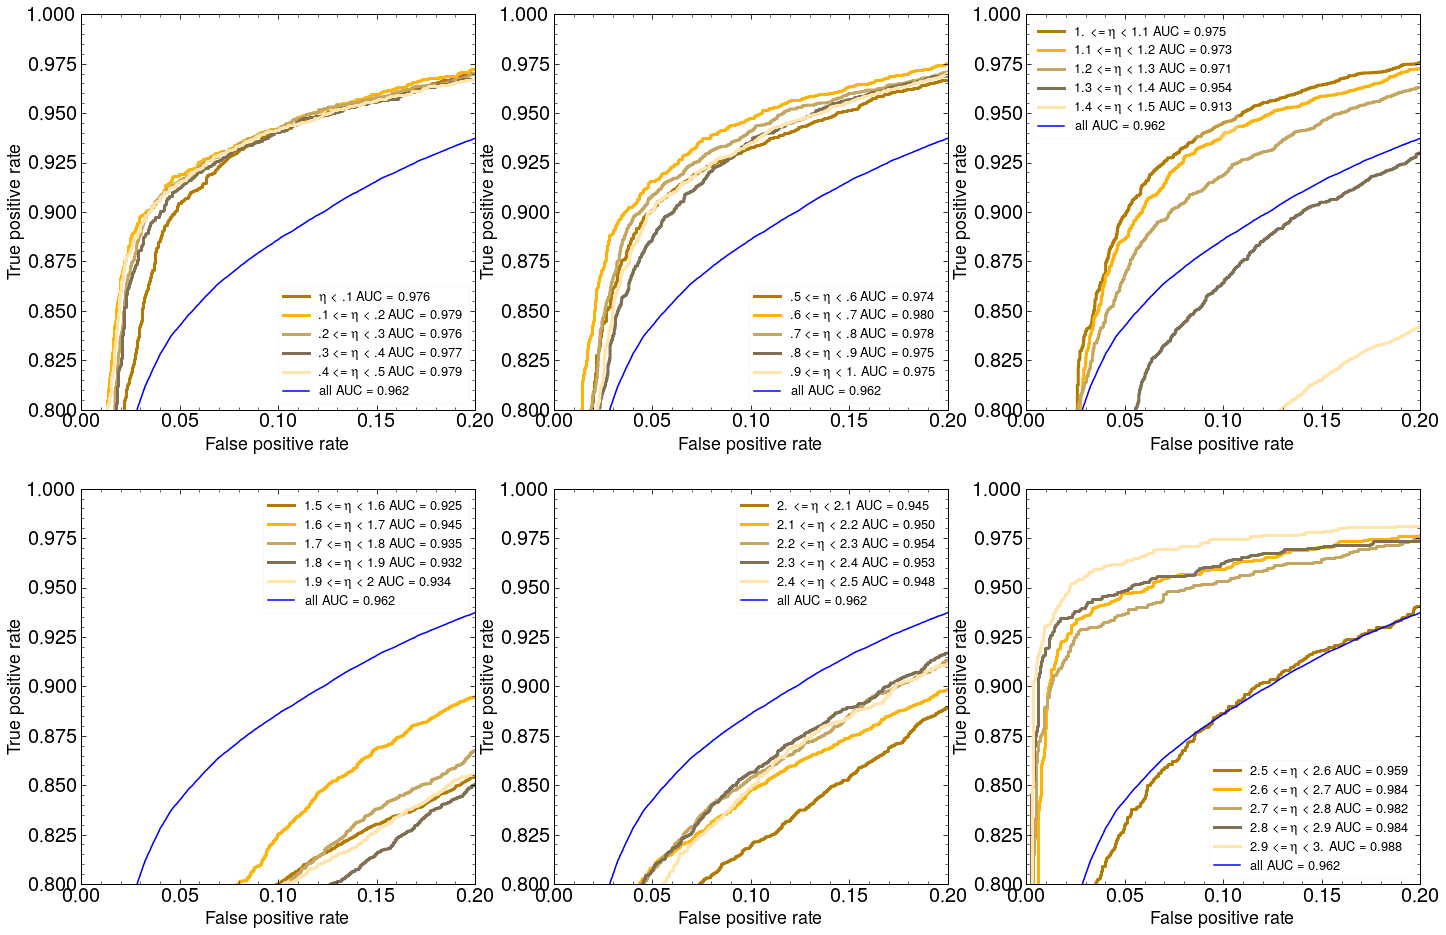

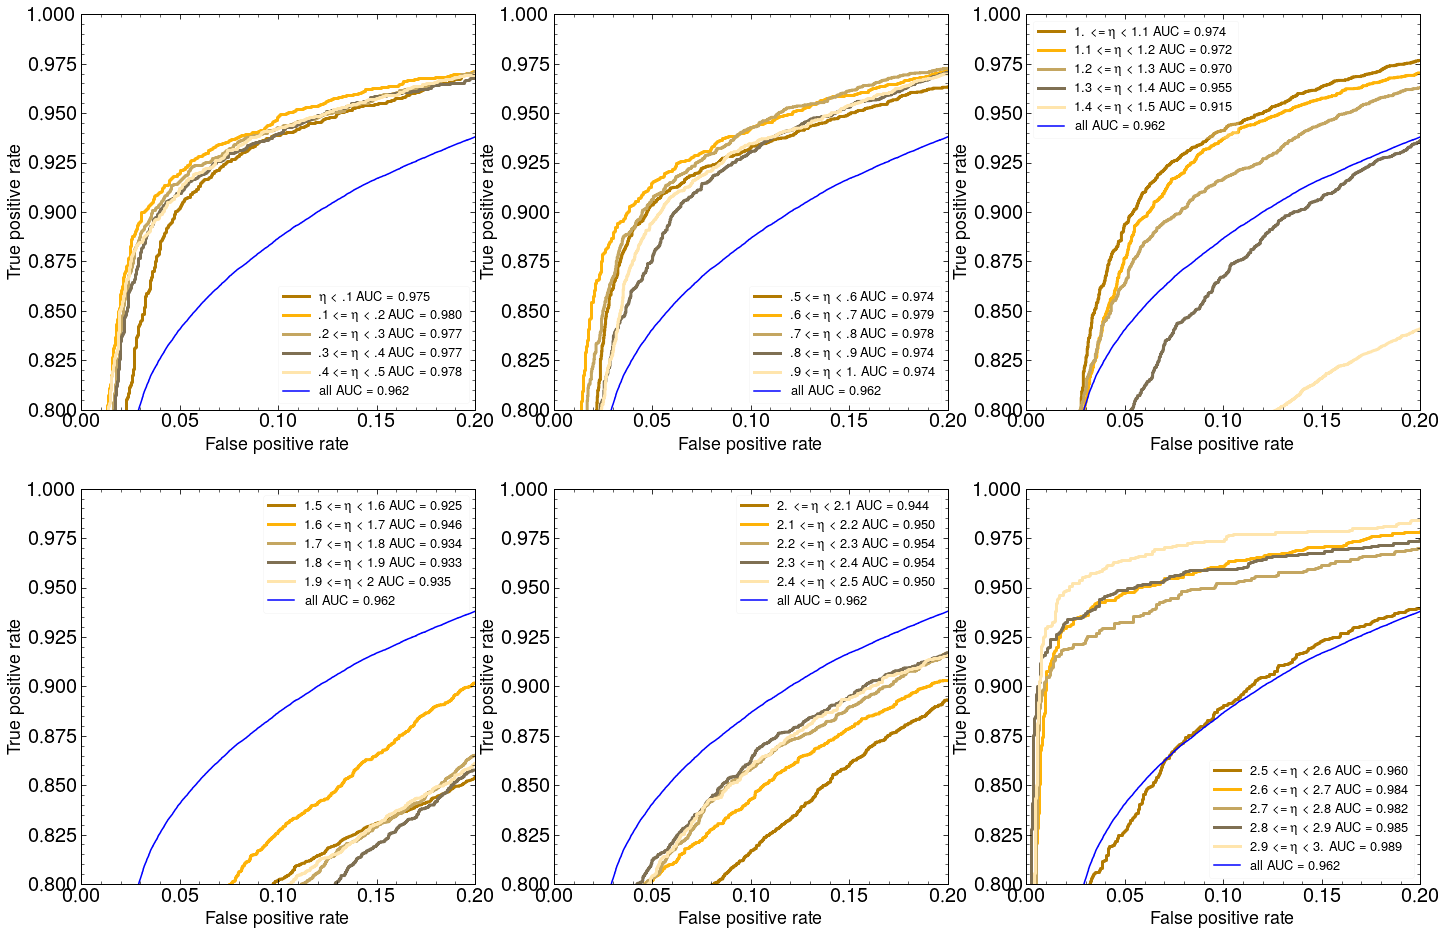

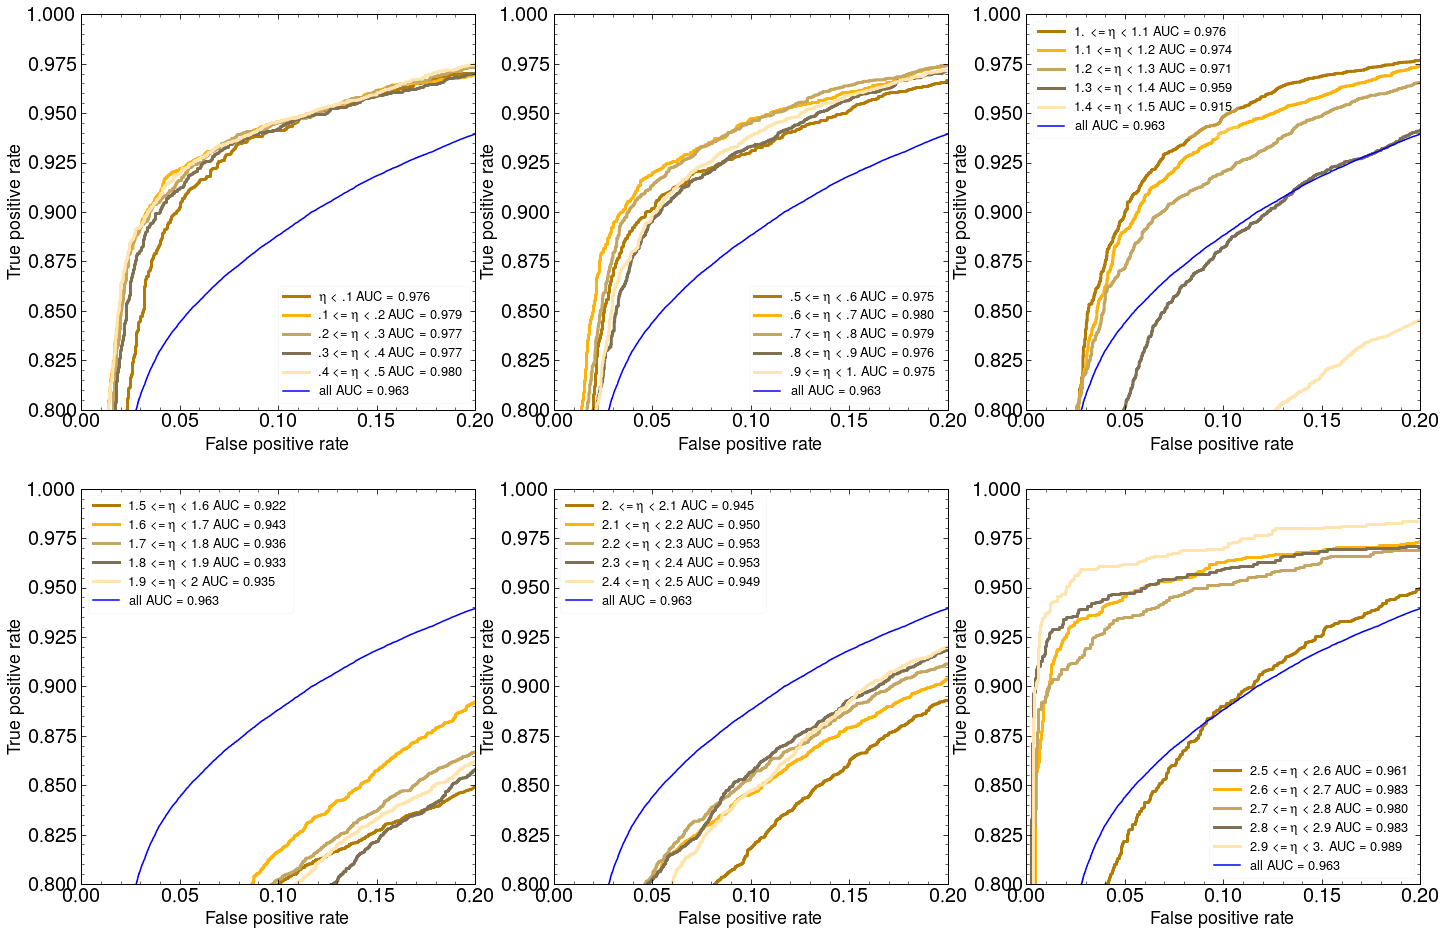

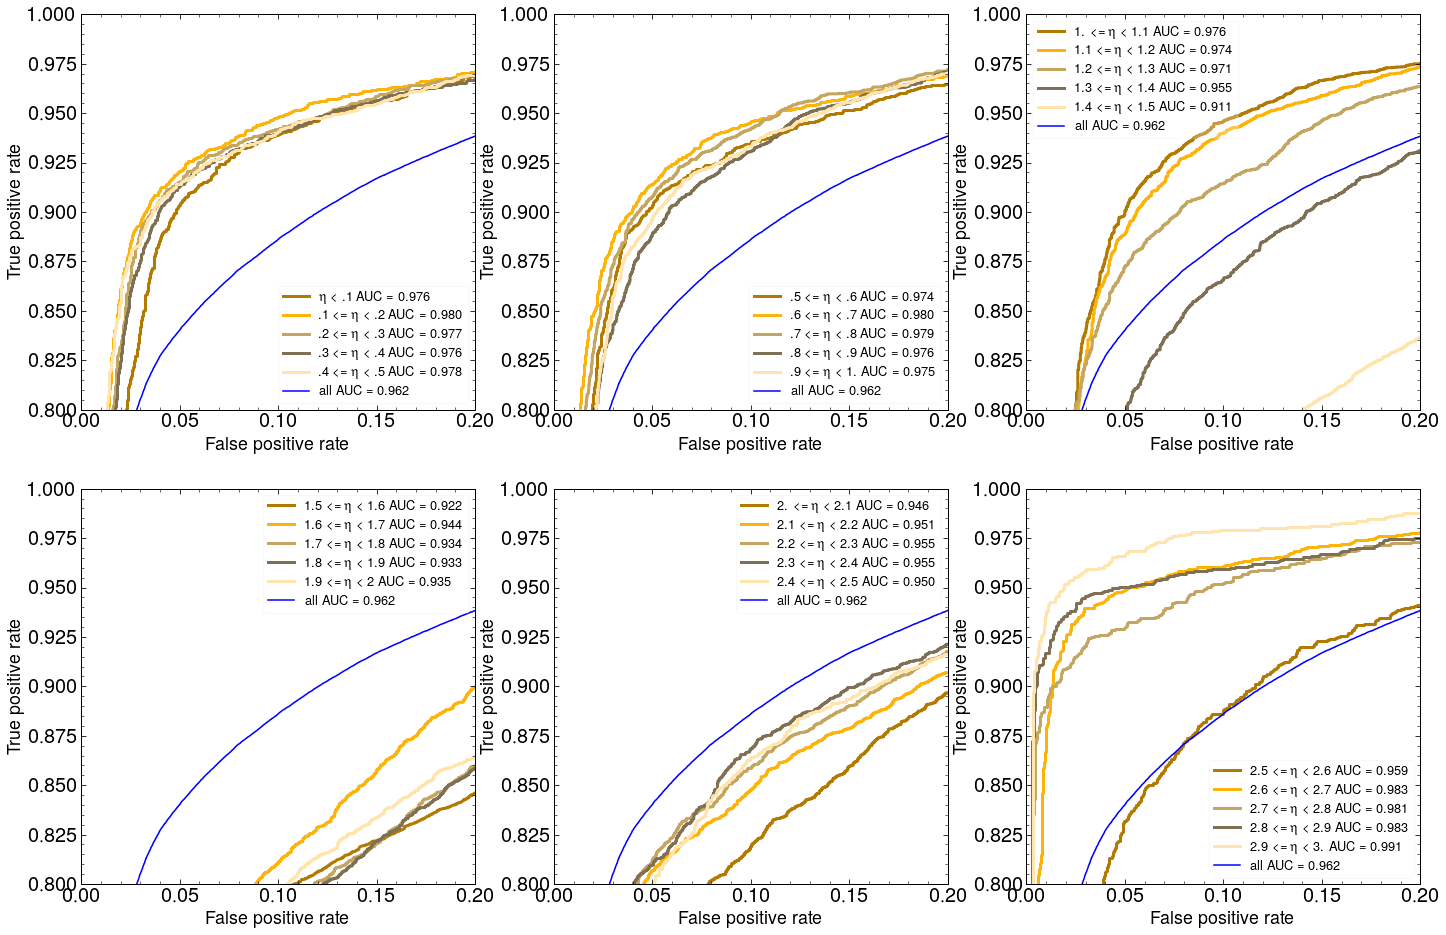

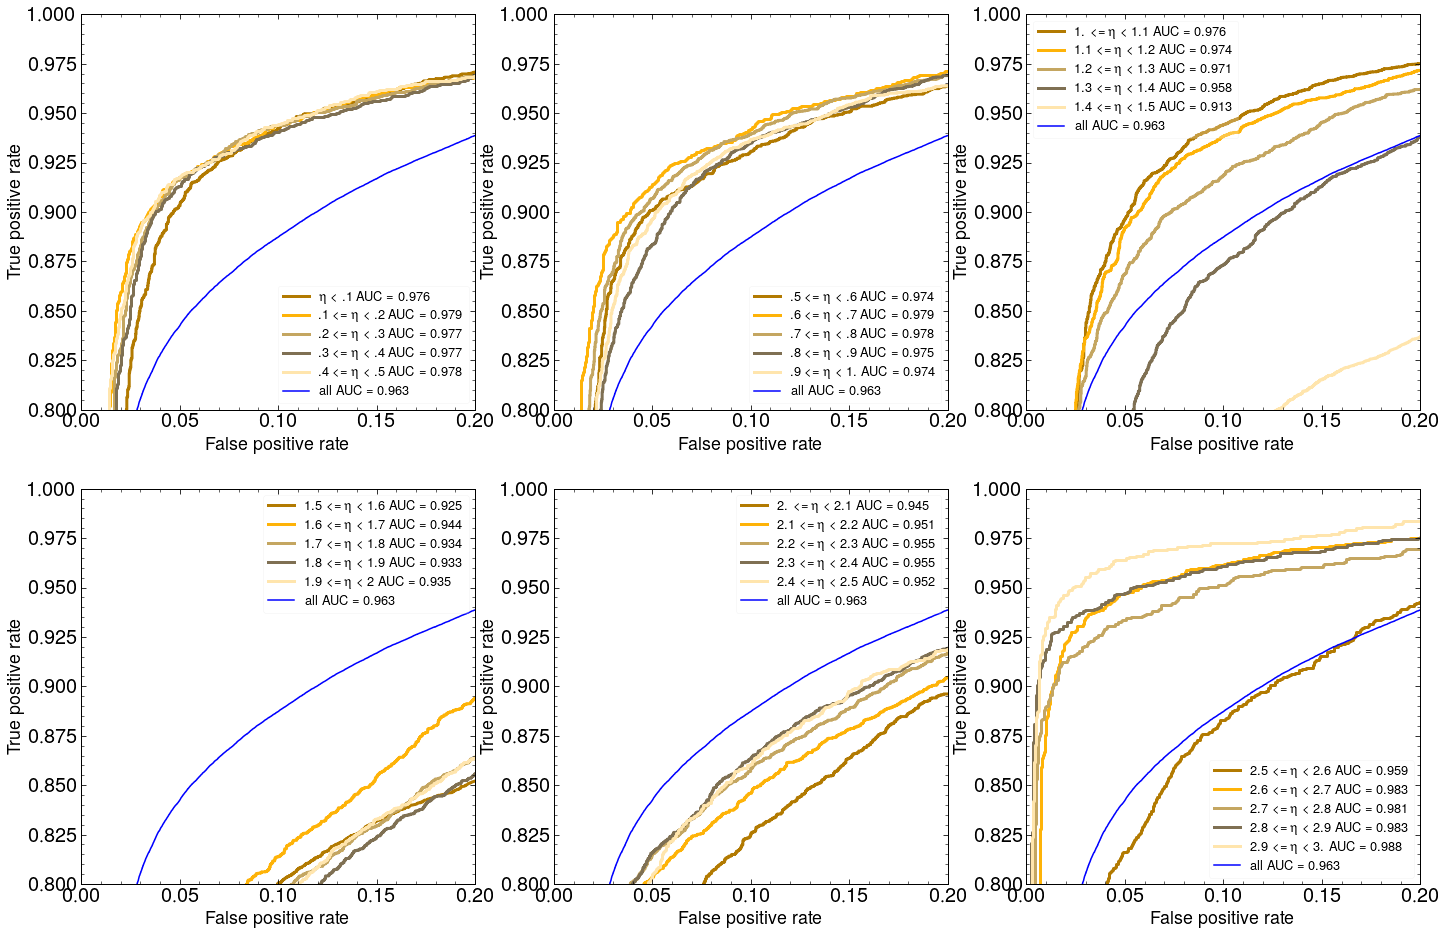

In [16]:
#plot aucs of all the different ones, I'll average the auc vs eta plots
for i in range(len(fps_ng_list)):
    AUCplot(eta_ranges, fps_ng_list[i], tps_ng_list[i], auc_ng_list[i], rangetype='eta')

In [21]:
len(auc_ng_list[0])

31

In [44]:
auc_ave = []
for i in range(len(auc_ng_list[0])):
    sums = auc_ng_list[0][i] + auc_ng_list[1][i] + auc_ng_list[2][i] + auc_ng_list[3][i] + auc_ng_list[4][i]
    auc_ave.append(sums/5.)

In [45]:
auc_ave

[0.975766899426134,
 0.9794888538107909,
 0.9769183860065785,
 0.9769972910303402,
 0.9786216209141514,
 0.9741111113144502,
 0.9795892216944369,
 0.9782384052071516,
 0.9750550613639565,
 0.9745517909697664,
 0.9751897619470397,
 0.9733704359294132,
 0.970587331180087,
 0.9561301248361355,
 0.9133010374980541,
 0.9237459879110279,
 0.9445477526484829,
 0.9348045995402977,
 0.932806938593771,
 0.9348806850266618,
 0.9449355524264151,
 0.9505825378654429,
 0.9541834187570313,
 0.9538395602696441,
 0.9497768353726362,
 0.9596626191641257,
 0.9831500219820581,
 0.9813046861958664,
 0.9835067603745097,
 0.9890864994899313,
 0.9623980321394459]

In [40]:
reg95_ngs = []
for j in range(len(fps_ng_list)):
    reg95_ngs.append(interp95(fps_ng_list[j], tps_ng_list[j]))

/home/kaelaekd/start_tf/LCStudies/classifier/Week7_PFNutils.py:79: RuntimeWarning: divide by zero encountered in true_divide
  fg.append(interp1d(tps[i], 1/fps[i]))


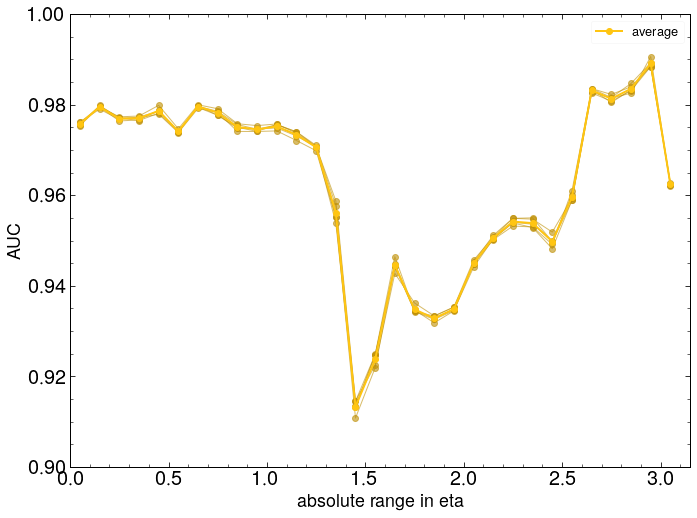

In [31]:
#no global features
plt.xlim(0., max(eta_ranges)+.1)
plt.plot(eta_ranges, auc_ng_list[0], linewidth=1, alpha=.6, c='xkcd:ochre', marker='o')
plt.plot(eta_ranges, auc_ng_list[1], linewidth=1, alpha=.6, c='xkcd:ochre', marker='o')
plt.plot(eta_ranges, auc_ng_list[2], linewidth=1, alpha=.6, c='xkcd:ochre', marker='o')
plt.plot(eta_ranges, auc_ng_list[3], linewidth=1, alpha=.6, c='xkcd:ochre', marker='o')
plt.plot(eta_ranges, auc_ng_list[4], linewidth=1, alpha=.6, c='xkcd:ochre', marker='o')
plt.plot(eta_ranges, auc_ave, linewidth=2, c='xkcd:sunflower', marker='o', label='average')
plt.xlabel('absolute range in eta')
plt.ylabel('AUC')
plt.legend()


In [41]:
reg95_ng_ave = []
for i in range(len(reg95_ngs[0])):
    sums = reg95_ngs[0][i] + reg95_ngs[1][i] + reg95_ngs[2][i] + reg95_ngs[3][i] + reg95_ngs[4][i]
    reg95_ng_ave.append(sums/5.)

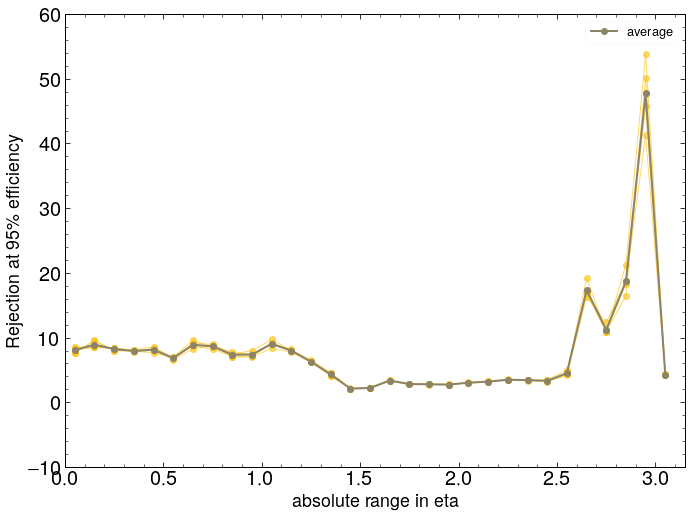

In [13]:
plt.xlim(0., max(eta_ranges)+.1)
plt.plot(eta_ranges, reg95_ngs[0], linewidth=1, alpha=.6, c='xkcd:marigold', marker='o')
plt.plot(eta_ranges, reg95_ngs[1], linewidth=1, alpha=.6, c='xkcd:marigold', marker='o')
plt.plot(eta_ranges, reg95_ngs[2], linewidth=1, alpha=.6, c='xkcd:marigold', marker='o')
plt.plot(eta_ranges, reg95_ngs[3], linewidth=1, alpha=.6, c='xkcd:marigold', marker='o')
plt.plot(eta_ranges, reg95_ngs[4], linewidth=1, alpha=.6, c='xkcd:marigold', marker='o')
plt.plot(eta_ranges, reg95_ng_ave, linewidth=2, c='xkcd:brown grey', marker='o', label='average')
plt.xlabel('absolute range in eta')
plt.ylabel('Rejection at 95\% efficiency')
plt.legend()
#for no glob models

In [14]:
#now for no glob, but seed: 
modellist = ['w8_pfn_noglob_s1.hdf5', 'w8_pfn_noglob_s2.hdf5', 'w8_pfn_noglob_s3.hdf5', 'w8_pfn_noglob_s4.hdf5', 'w8_pfn_noglob_s5.hdf5']
fps_ngse_list, tps_ngse_list, auc_ngse_list = retrieve_metrics(modellist)

PFN AUC: 0.9760375337013933
PFN AUC: 0.9800302097401119
PFN AUC: 0.9773490973042165
PFN AUC: 0.9773665180234385
PFN AUC: 0.9784168892257954
PFN AUC: 0.9740879960212937
PFN AUC: 0.9802418104403043
PFN AUC: 0.9786058322140984
PFN AUC: 0.9756582311368024
PFN AUC: 0.9741846166879475
PFN AUC: 0.9752221938713337
PFN AUC: 0.9738491452773516
PFN AUC: 0.9707024619613941
PFN AUC: 0.955741212622059
PFN AUC: 0.914641664276184
PFN AUC: 0.9259450652413114
PFN AUC: 0.9481843462895979
PFN AUC: 0.9361643889797288
PFN AUC: 0.9350522205624947
PFN AUC: 0.9364391606255054
PFN AUC: 0.9463452856381943
PFN AUC: 0.9518002556470282
PFN AUC: 0.9555447914081111
PFN AUC: 0.9561381107123589
PFN AUC: 0.9530825265920468
PFN AUC: 0.9644399524034004
PFN AUC: 0.984126919256283
PFN AUC: 0.982182124150128
PFN AUC: 0.9854465030799137
PFN AUC: 0.9902965861426385
PFN AUC: 0.963457619324319
PFN AUC: 0.9776349235898713
PFN AUC: 0.9815567427575916
PFN AUC: 0.9790970784578883
PFN AUC: 0.9788270925576554
PFN AUC: 0.98046875560282

In [15]:
auc_ngse_ave = []
for i in range(len(auc_ngse_list[0])):
    sums = auc_ngse_list[0][i] + auc_ngse_list[1][i] + auc_ngse_list[2][i] + auc_ngse_list[3][i] + auc_ngse_list[4][i]
    auc_ngse_ave.append(sums/5.)

In [20]:
reg95_ngse = []
for j in range(len(fps_ngse_list)):
    reg95_ngse.append(interp95(fps_ngse_list[j], tps_ngse_list[j]))
    
reg95_ngse_ave = []
for i in range(len(reg95_ngse[0])):
    sums = reg95_ngse[0][i] + reg95_ngse[1][i] + reg95_ngse[2][i] + reg95_ngse[3][i] + reg95_ngse[4][i]
    reg95_ngse_ave.append(sums/5.)

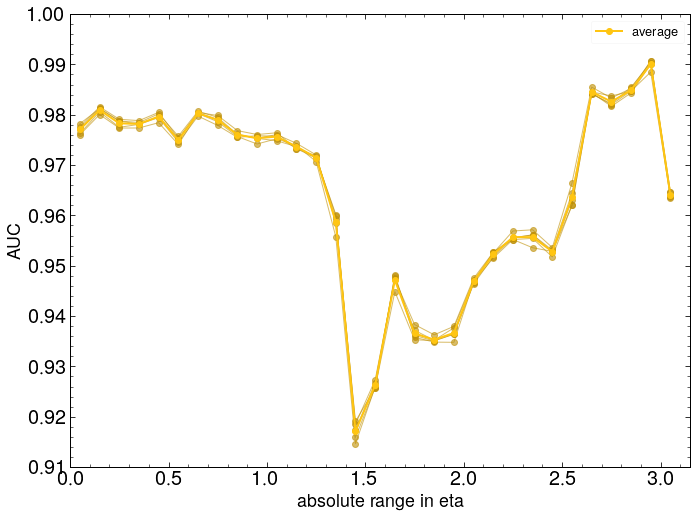

In [17]:
#no glob, seed
plt.xlim(0., max(eta_ranges)+.1)
plt.plot(eta_ranges, auc_ngse_list[0], linewidth=1, alpha=.6, c='xkcd:ochre', marker='o')
plt.plot(eta_ranges, auc_ngse_list[1], linewidth=1, alpha=.6, c='xkcd:ochre', marker='o')
plt.plot(eta_ranges, auc_ngse_list[2], linewidth=1, alpha=.6, c='xkcd:ochre', marker='o')
plt.plot(eta_ranges, auc_ngse_list[3], linewidth=1, alpha=.6, c='xkcd:ochre', marker='o')
plt.plot(eta_ranges, auc_ngse_list[4], linewidth=1, alpha=.6, c='xkcd:ochre', marker='o')
plt.plot(eta_ranges, auc_ngse_ave, linewidth=2, c='xkcd:sunflower', marker='o', label='average')
plt.xlabel('absolute range in eta')
plt.ylabel('AUC')
plt.legend()
#almost looks like more variation with a seed??!!

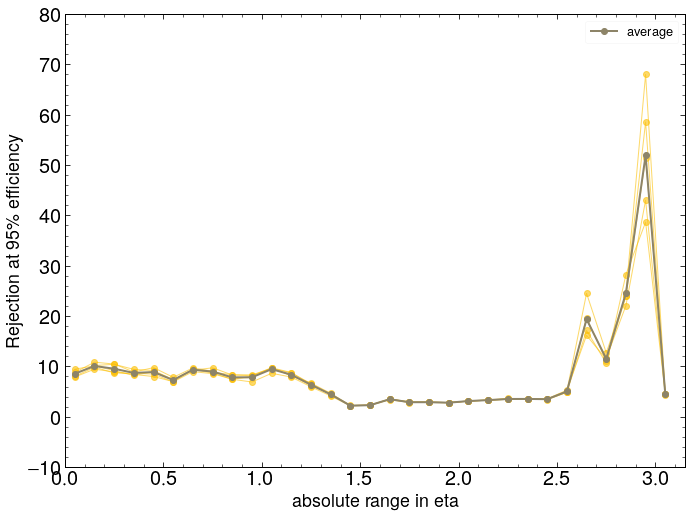

In [21]:
plt.xlim(0., max(eta_ranges)+.1)
plt.plot(eta_ranges, reg95_ngse[0], linewidth=1, alpha=.6, c='xkcd:marigold', marker='o')
plt.plot(eta_ranges, reg95_ngse[1], linewidth=1, alpha=.6, c='xkcd:marigold', marker='o')
plt.plot(eta_ranges, reg95_ngse[2], linewidth=1, alpha=.6, c='xkcd:marigold', marker='o')
plt.plot(eta_ranges, reg95_ngse[3], linewidth=1, alpha=.6, c='xkcd:marigold', marker='o')
plt.plot(eta_ranges, reg95_ngse[4], linewidth=1, alpha=.6, c='xkcd:marigold', marker='o')
plt.plot(eta_ranges, reg95_ngse_ave, linewidth=2, c='xkcd:brown grey', marker='o', label='average')
plt.xlabel('absolute range in eta')
plt.ylabel('Rejection at 95\% efficiency')
plt.legend()
#for no glob models

In [23]:
X_glob_te = file['arr_8']

In [24]:
def retrieve_globmetrics(modellist):

    fps_list = []
    tps_list = []
    auc_list = []
    for modelname in modellist:
        model = tf.keras.models.load_model(data_path+modelname)
        fps, tps, auc = metrics(model, X_test, X_glob_te, Y_test, eta_sel)
        fps_list.append(fps)
        tps_list.append(tps)
        auc_list.append(auc)
        
    return fps_list, tps_list, auc_list


In [26]:
#now global eta, no seed:
modellist = ['w8_pfn_globeta_1.hdf5', 'w8_pfn_globeta_2.hdf5', 'w8_pfn_globeta_3.hdf5', 'w8_pfn_globeta_4.hdf5', 'w8_pfn_globeta_5.hdf5']
fps_g_list, tps_g_list, auc_g_list = retrieve_globmetrics(modellist)

PFN AUC: 0.976019997746261
PFN AUC: 0.9802582889061381
PFN AUC: 0.9781306058683692
PFN AUC: 0.9773773646310431
PFN AUC: 0.9782447704581084
PFN AUC: 0.9737408526837313
PFN AUC: 0.980224869352629
PFN AUC: 0.9788372996027281
PFN AUC: 0.9763256660230564
PFN AUC: 0.9751888412342652
PFN AUC: 0.9754359570837183
PFN AUC: 0.9739400162119648
PFN AUC: 0.9701955518975309
PFN AUC: 0.9592295045205826
PFN AUC: 0.9138287684903158
PFN AUC: 0.9270396740413615
PFN AUC: 0.9466962599940375
PFN AUC: 0.9370016932459233
PFN AUC: 0.9346130449853224
PFN AUC: 0.934911228473948
PFN AUC: 0.9456341484355354
PFN AUC: 0.9514874201565383
PFN AUC: 0.954613991086545
PFN AUC: 0.9557452746194881
PFN AUC: 0.9527616676950084
PFN AUC: 0.9642393781985029
PFN AUC: 0.9844739540435857
PFN AUC: 0.980858534362579
PFN AUC: 0.9851768598868368
PFN AUC: 0.9893874333277023
PFN AUC: 0.963715228985375
PFN AUC: 0.9759075487313962
PFN AUC: 0.9801793319584047
PFN AUC: 0.9768928165869363
PFN AUC: 0.9776073785918741
PFN AUC: 0.978339256489953

In [27]:
auc_g_ave = []
for i in range(len(auc_g_list[0])):
    sums = auc_g_list[0][i] + auc_g_list[1][i] + auc_g_list[2][i] + auc_g_list[3][i] + auc_g_list[4][i]
    auc_g_ave.append(sums/5.)

In [28]:
reg95_g = []
for j in range(len(fps_g_list)):
    reg95_g.append(interp95(fps_g_list[j], tps_g_list[j]))
    
reg95_g_ave = []
for i in range(len(reg95_g[0])):
    sums = reg95_g[0][i] + reg95_g[1][i] + reg95_g[2][i] + reg95_g[3][i] + reg95_g[4][i]
    reg95_g_ave.append(sums/5.)

/home/kaelaekd/start_tf/LCStudies/classifier/Week7_PFNutils.py:79: RuntimeWarning: divide by zero encountered in true_divide
  fg.append(interp1d(tps[i], 1/fps[i]))


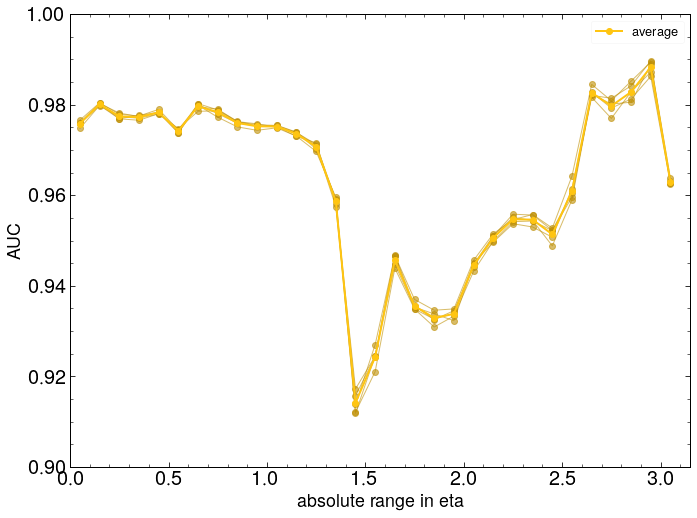

In [29]:
#global eta, no seed
plt.xlim(0., max(eta_ranges)+.1)
plt.plot(eta_ranges, auc_g_list[0], linewidth=1, alpha=.6, c='xkcd:ochre', marker='o')
plt.plot(eta_ranges, auc_g_list[1], linewidth=1, alpha=.6, c='xkcd:ochre', marker='o')
plt.plot(eta_ranges, auc_g_list[2], linewidth=1, alpha=.6, c='xkcd:ochre', marker='o')
plt.plot(eta_ranges, auc_g_list[3], linewidth=1, alpha=.6, c='xkcd:ochre', marker='o')
plt.plot(eta_ranges, auc_g_list[4], linewidth=1, alpha=.6, c='xkcd:ochre', marker='o')
plt.plot(eta_ranges, auc_g_ave, linewidth=2, c='xkcd:sunflower', marker='o', label='average')
plt.xlabel('absolute range in eta')
plt.ylabel('AUC')
plt.legend()

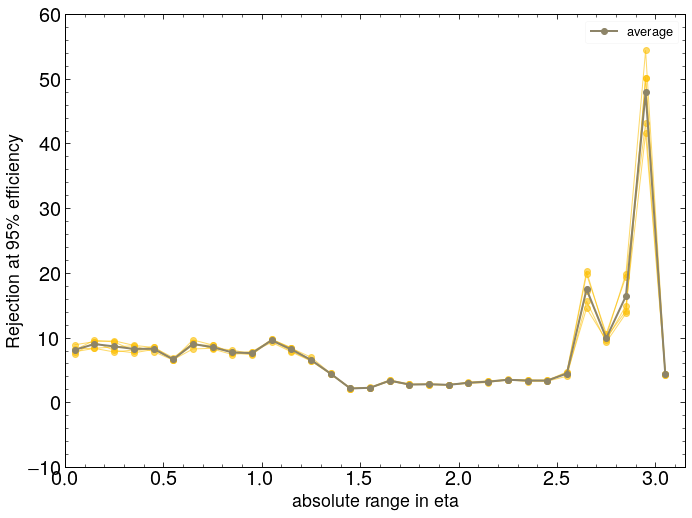

In [30]:
plt.xlim(0., max(eta_ranges)+.1)
plt.plot(eta_ranges, reg95_g[0], linewidth=1, alpha=.6, c='xkcd:marigold', marker='o')
plt.plot(eta_ranges, reg95_g[1], linewidth=1, alpha=.6, c='xkcd:marigold', marker='o')
plt.plot(eta_ranges, reg95_g[2], linewidth=1, alpha=.6, c='xkcd:marigold', marker='o')
plt.plot(eta_ranges, reg95_g[3], linewidth=1, alpha=.6, c='xkcd:marigold', marker='o')
plt.plot(eta_ranges, reg95_g[4], linewidth=1, alpha=.6, c='xkcd:marigold', marker='o')
plt.plot(eta_ranges, reg95_g_ave, linewidth=2, c='xkcd:brown grey', marker='o', label='average')
plt.xlabel('absolute range in eta')
plt.ylabel('Rejection at 95\% efficiency')
plt.legend()

In [32]:
#now global eta with seed:
modellist = ['w8_pfn_globeta_s1.hdf5', 'w8_pfn_globeta_s2.hdf5', 'w8_pfn_globeta_s3.hdf5', 'w8_pfn_globeta_s4.hdf5', 'w8_pfn_globeta_s5.hdf5']
fps_gs_list, tps_gs_list, auc_gs_list = retrieve_globmetrics(modellist)

PFN AUC: 0.9771508408121683
PFN AUC: 0.9801275907763487
PFN AUC: 0.9777286652473977
PFN AUC: 0.9786071252377077
PFN AUC: 0.9800809280930818
PFN AUC: 0.9755286822661997
PFN AUC: 0.9804428884349388
PFN AUC: 0.9784763879436977
PFN AUC: 0.9761161167129042
PFN AUC: 0.9754766371804838
PFN AUC: 0.9757441113463737
PFN AUC: 0.9750297298630037
PFN AUC: 0.972078672469624
PFN AUC: 0.9591978104975714
PFN AUC: 0.918938824110376
PFN AUC: 0.9262323794886319
PFN AUC: 0.9496351200859836
PFN AUC: 0.9379759613612727
PFN AUC: 0.9354375293026719
PFN AUC: 0.9373382835488167
PFN AUC: 0.9467067485634162
PFN AUC: 0.9520270560799085
PFN AUC: 0.9567658879742451
PFN AUC: 0.9564952835560833
PFN AUC: 0.9543972469410456
PFN AUC: 0.963885912235185
PFN AUC: 0.9829841652661221
PFN AUC: 0.9786289030954068
PFN AUC: 0.982923964478489
PFN AUC: 0.9891107915817098
PFN AUC: 0.9643941997178733
PFN AUC: 0.9748463260246707
PFN AUC: 0.9800753211328234
PFN AUC: 0.9772764707608742
PFN AUC: 0.9770418021198553
PFN AUC: 0.9794985481064

In [33]:
auc_gs_ave = []
for i in range(len(auc_gs_list[0])):
    sums = auc_gs_list[0][i] + auc_gs_list[1][i] + auc_gs_list[2][i] + auc_gs_list[3][i] + auc_gs_list[4][i]
    auc_gs_ave.append(sums/5.)

In [34]:
reg95_gs = []
for j in range(len(fps_gs_list)):
    reg95_gs.append(interp95(fps_gs_list[j], tps_gs_list[j]))
    
reg95_gs_ave = []
for i in range(len(reg95_gs[0])):
    sums = reg95_gs[0][i] + reg95_gs[1][i] + reg95_gs[2][i] + reg95_gs[3][i] + reg95_gs[4][i]
    reg95_gs_ave.append(sums/5.)

/home/kaelaekd/start_tf/LCStudies/classifier/Week7_PFNutils.py:79: RuntimeWarning: divide by zero encountered in true_divide
  fg.append(interp1d(tps[i], 1/fps[i]))


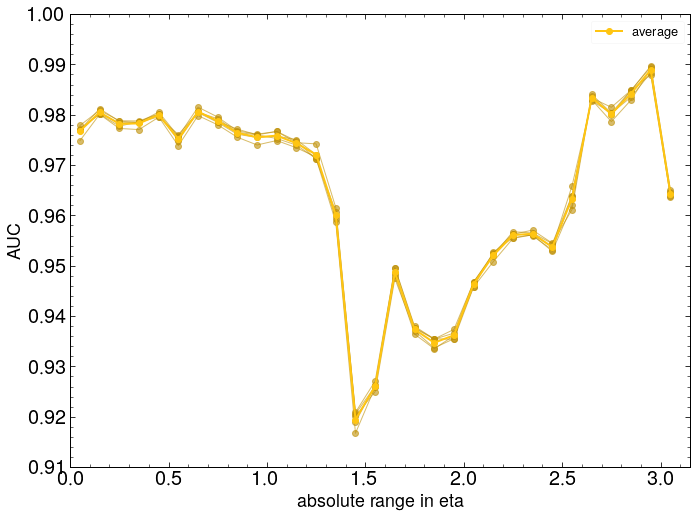

In [35]:
#global eta, seed
plt.xlim(0., max(eta_ranges)+.1)
plt.plot(eta_ranges, auc_gs_list[0], linewidth=1, alpha=.6, c='xkcd:ochre', marker='o')
plt.plot(eta_ranges, auc_gs_list[1], linewidth=1, alpha=.6, c='xkcd:ochre', marker='o')
plt.plot(eta_ranges, auc_gs_list[2], linewidth=1, alpha=.6, c='xkcd:ochre', marker='o')
plt.plot(eta_ranges, auc_gs_list[3], linewidth=1, alpha=.6, c='xkcd:ochre', marker='o')
plt.plot(eta_ranges, auc_gs_list[4], linewidth=1, alpha=.6, c='xkcd:ochre', marker='o')
plt.plot(eta_ranges, auc_gs_ave, linewidth=2, c='xkcd:sunflower', marker='o', label='average')
plt.xlabel('absolute range in eta')
plt.ylabel('AUC')
plt.legend()

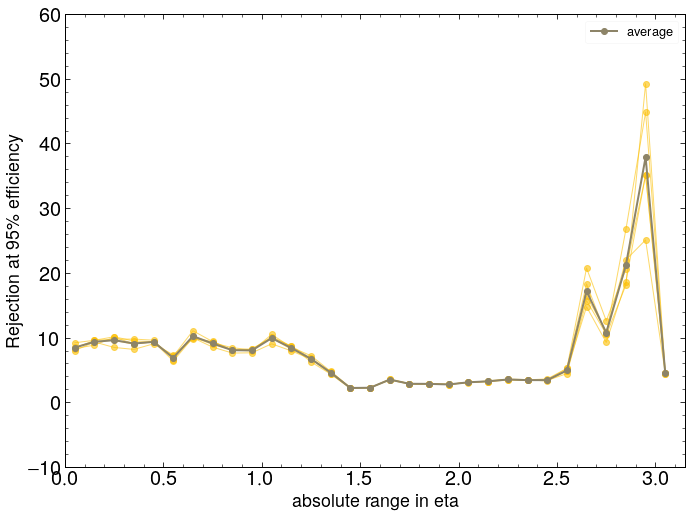

In [36]:
plt.xlim(0., max(eta_ranges)+.1)
plt.plot(eta_ranges, reg95_gs[0], linewidth=1, alpha=.6, c='xkcd:marigold', marker='o')
plt.plot(eta_ranges, reg95_gs[1], linewidth=1, alpha=.6, c='xkcd:marigold', marker='o')
plt.plot(eta_ranges, reg95_gs[2], linewidth=1, alpha=.6, c='xkcd:marigold', marker='o')
plt.plot(eta_ranges, reg95_gs[3], linewidth=1, alpha=.6, c='xkcd:marigold', marker='o')
plt.plot(eta_ranges, reg95_gs[4], linewidth=1, alpha=.6, c='xkcd:marigold', marker='o')
plt.plot(eta_ranges, reg95_gs_ave, linewidth=2, c='xkcd:brown grey', marker='o', label='average')
plt.xlabel('absolute range in eta')
plt.ylabel('Rejection at 95\% efficiency')
plt.legend()

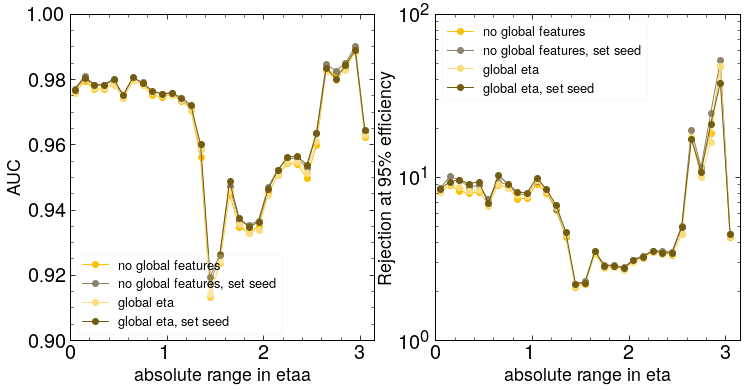

In [47]:
#now compare all averages:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12,6])

ax1.set_xlim(0., max(eta_ranges)+.1)
ax1.plot(eta_ranges, auc_ave, linewidth=1, c='xkcd:marigold', marker='o', label='no global features')
ax1.plot(eta_ranges, auc_ngse_ave, linewidth=1, c='xkcd:brown grey', marker='o', label='no global features, set seed')
ax1.plot(eta_ranges, auc_g_ave, linewidth=1, c='xkcd:wheat', marker='o', label='global eta')
ax1.plot(eta_ranges, auc_gs_ave, linewidth=1, c='xkcd:mud', marker='o', label='global eta, set seed')
ax1.set_xlabel('absolute range in etaa')
ax1.set_ylabel('AUC')
ax1.legend()


ax2.semilogy()
ax2.set_xlim(0., max(eta_ranges)+.1)
ax2.plot(eta_ranges, reg95_ng_ave, linewidth=1, c='xkcd:marigold', marker='o', label='no global features')
ax2.plot(eta_ranges, reg95_ngse_ave, linewidth=1, c='xkcd:brown grey', marker='o', label='no global features, set seed')
ax2.plot(eta_ranges, reg95_g_ave, linewidth=1, c='xkcd:wheat', marker='o', label='global eta')
ax2.plot(eta_ranges, reg95_gs_ave, linewidth=1, c='xkcd:mud', marker='o', label='global eta, set seed')
ax2.set_xlabel('absolute range in eta')
ax2.set_ylabel('Rejection at 95\% efficiency')
ax2.legend()